# Lab | Data cleaning and wrangling

For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs. 

### Instructions

So far we have worked on `EDA`. This lab will focus on data cleaning and wrangling from everything we noticed before.

1. We will start with removing outliers. So far, we have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.
2. Create a copy of the dataframe for the data wrangling.
3. Normalize the continuous variables. You can use any one method you want.
4. Encode the categorical variables
5. The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.
6. Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

**Hint for Categorical Variables**

- You should deal with the categorical variables as shown below (for ordinal encoding, dummy code has been provided as well):

```python
# One hot to state
# Ordinal to coverage
# Ordinal to employmentstatus
# Ordinal to location code
# One hot to marital status
# One hot to policy type
# One hot to policy
# One hot to renew offercustomer_df
# One hot to sales channel
# One hot vehicle class
# Ordinal vehicle size

data["coverage"] = data["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
# given that column "coverage" in the dataframe "data" has three categories:
# "basic", "extended", and "premium" and values are to be represented in the same order.
```



In [120]:
# Import the necessary libraries
import pandas as pd

import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [121]:
# Import and concat the dataframes
categorical_df = pd.read_csv('/Users/leozinho.air/Desktop/ironhack_da/class_11/lab-cleaning-categorical-data/categorical.csv')
numerical_df = pd.read_csv('/Users/leozinho.air/Desktop/ironhack_da/class_11/lab-cleaning-numerical-data/ numerical.csv')

df = pd.concat([categorical_df,numerical_df], axis = 1)

if 'Unnamed: 0' in df.columns: # there are 2 Unnamed: 0 columns
    df = df.drop('Unnamed: 0', axis=1) # dropping them
    df = df.reset_index(drop=True)

print(df.dtypes)


customer                          object
state                             object
response                           int64
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
location_code                     object
marital_status                    object
renew_offer_type                  object
sales_channel                     object
vehicle_class                     object
vehicle_size                      object
gender_f                           int64
gender_m                           int64
policy_combined                   object
corporate_auto                     int64
personal_auto                      int64
special_auto                       int64
customer_lifetime_value          float64
total_claim_amount               float64
income                             int64
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_pol

## Handling Outliers


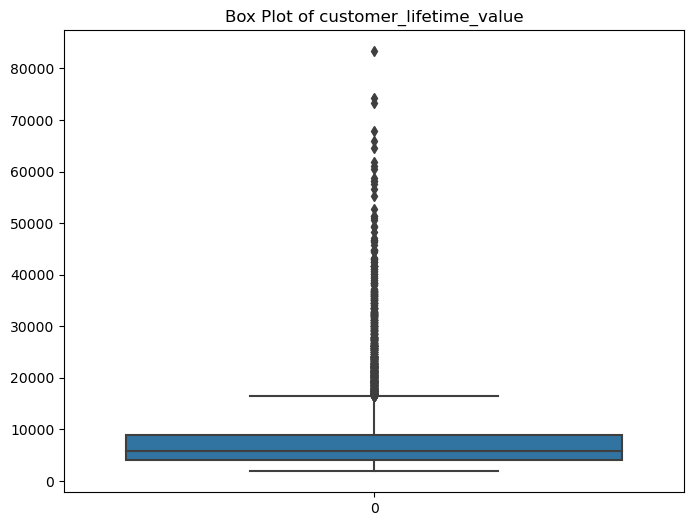

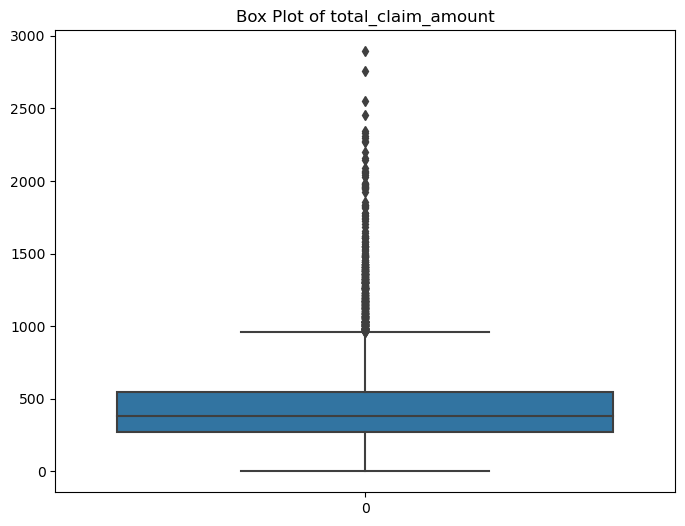

In [122]:
# Handling Outliers

# Check outlier using box-plots

def plot_boxplot(df):
    '''Plot box plots for numerical continous columns'''
    
    numerical_cols = df.select_dtypes(include='float')
    
    for col in numerical_cols:
        plt.figure(figsize=(8, 6))
        sns.boxplot(data=df[col])
        plt.title(f'Box Plot of {col}')
        plt.show()

plot_boxplot(df)


# Remove Outliers

def remove_outliers(df, columns):
    '''This functions detect and remove outliers using the IQR method'''
    
    for column_name in columns:
        Q1 = df[column_name].quantile(0.25)
        Q3 = df[column_name].quantile(0.75)
        IQR = Q3 - Q1

        threshold = 1.5
        outliers = df[(df[column_name] <= Q1 - threshold * IQR) | (df[column_name] >= Q3 + threshold * IQR)]
        
        df = df.drop(outliers.index)
    
    return df

df = remove_outliers(df,['total_claim_amount','customer_lifetime_value'])

df = df.reset_index (drop = True)




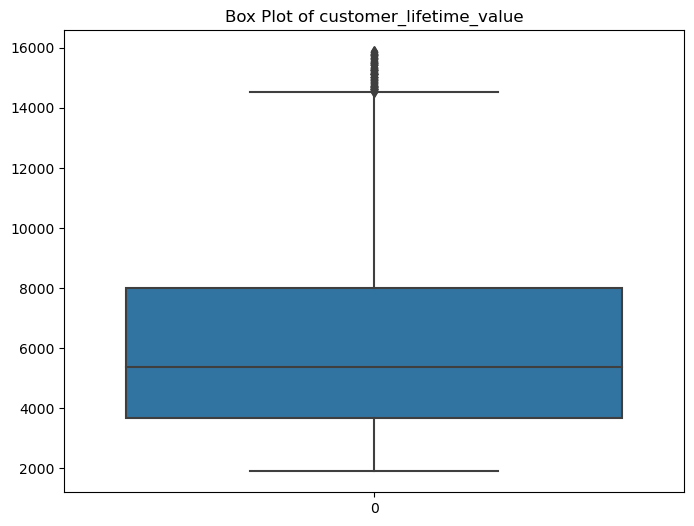

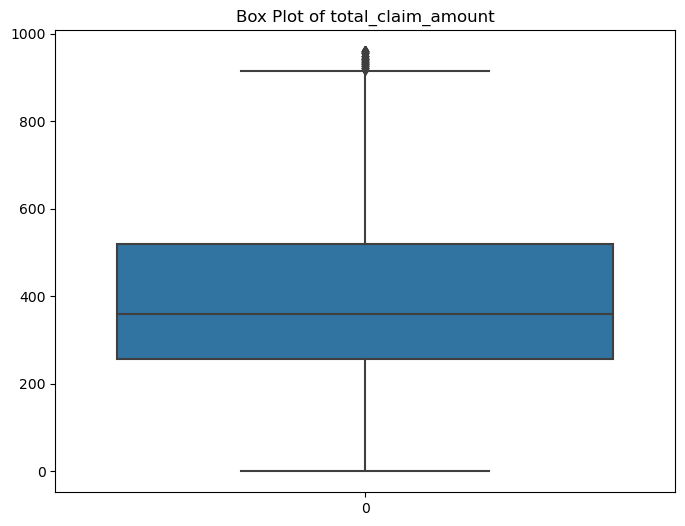

,customer,state,response,coverage,education,effective_to_date,employmentstatus,location_code,marital_status,renew_offer_type,sales_channel,vehicle_class,vehicle_size,gender_f,gender_m,policy_combined,corporate_auto,personal_auto,special_auto,customer_lifetime_value,total_claim_amount,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,BU79786,Washington,0,Basic,Bachelor,2011-02-24,Employed,Suburban,Married,Offer1,Agent,Two-Door Car,Medsize,1,0,Corporate Auto_L3,1,0,0,2763.519279,384.811147,56274,69,32,5,0,1
1,AI49188,Nevada,0,Premium,Bachelor,2011-02-19,Employed,Suburban,Married,Offer1,Agent,Two-Door Car,Medsize,1,0,Personal Auto_L3,0,1,0,12887.431650,566.472247,48767,108,18,38,0,2
2,WW63253,California,0,Basic,Bachelor,2011-01-20,Unemployed,Suburban,Married,Offer1,Call Center,SUV,Medsize,0,1,Corporate Auto_L2,1,0,0,7645.861827,529.881344,0,106,18,65,0,7
3,HB64268,Washington,0,Basic,Bachelor,2011-02-03,Employed,Rural,Single,Offer1,Agent,Four-Door Car,Medsize,0,1,Personal Auto_L1,0,1,0,2813.692575,138.130879,43836,73,12,44,0,1
4,OC83172,Oregon,1,Basic,Bachelor,2011-01-25,Employed,Rural,Married,Offer2,Web,Two-Door Car,Medsize,1,0,Personal Auto_L3,0,1,0,8256.297800,159.383042,62902,69,14,94,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7935,YM19146,California,0,Premium,College,2011-01-06,Employed,Suburban,Single,Offer1,Branch,Four-Door Car,Large,1,0,Personal Auto_L2,0,1,0,4100.398533,541.282007,47761,104,16,58,0,1
7936,PK87824,California,1,Extended,College,2011-02-12,Employed,Suburban,Divorced,Offer1,Branch,Four-Door Car,Medsize,1,0,Corporate Auto_L3,1,0,0,3096.511217,379.200000,21604,79,14,28,0,1
7937,TD14365,California,0,Extended,Bachelor,2011-02-06,Unemployed,Suburban,Single,Offer1,Branch,Four-Door Car,Medsize,0,1,Corporate Auto_L2,1,0,0,8163.890428,790.784983,0,85,9,37,3,2
7938,UP19263,California,0,Extended,College,2011-02-03,Employed,Suburban,Married,Offer3,Branch,Four-Door Car,Large,0,1,Personal Auto_L2,0,1,0,7524.442436,691.200000,21941,96,34,3,0,3


In [123]:

# Re-plot boxplot without outliers

plot_boxplot(df)

df

In [124]:
# Create a copy of the df for data wrangling

df_wrangling = df.copy()

# Saving the original df in a .csv file 

# Define the filename for the CSV file
filename = 'original_customer.csv'

# Save the DataFrame to a CSV file
df.to_csv(filename, index=True)



## Normalize continous variables

In [125]:
# Normalize the continuous variables. You can use any one method you want.

from sklearn.preprocessing import MinMaxScaler

cols_to_norm = ['customer_lifetime_value','total_claim_amount']

scaler = MinMaxScaler()

df_wrangling[cols_to_norm] = scaler.fit_transform(df_wrangling[cols_to_norm])

## Encode categorical

In [126]:

# One-Hot encoding

dummies_col = ['state','marital_status','policy_combined','renew_offer_type','sales_channel','vehicle_class',
              'employmentstatus', 'location_code', 'vehicle_size','coverage','education']
df_wrangling = pd.get_dummies(df_wrangling, columns= dummies_col)
df_wrangling

# I did not encode the ordinal features with the Label ecoding method.
# This why Label encoding might inadvertently imply an order that isn't present in the data,
# which could mislead the model during training. Therefore,
# using one-hot encoding ensures that no false ordinal relationship is introduced among categorical variables.

# Encode time variable

from datetime import date as dt
df_wrangling['effective_to_date'] = pd.to_datetime(df_wrangling['effective_to_date'])

# Create time features

df_wrangling['day'] = df_wrangling['effective_to_date'].dt.day
df_wrangling['week'] = df_wrangling['effective_to_date'].dt.week
df_wrangling['month'] = df_wrangling['effective_to_date'].dt.month




In [127]:
# This our wrangled dataframe

pd.set_option('display.max_columns', None)

display(df_wrangling.info())
display(df_wrangling.shape)

df_wrangling.reset_index(drop = True, inplace = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7940 entries, 0 to 7939
Data columns (total 69 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   customer                           7940 non-null   object        
 1   response                           7940 non-null   int64         
 2   effective_to_date                  7940 non-null   datetime64[ns]
 3   gender_f                           7940 non-null   int64         
 4   gender_m                           7940 non-null   int64         
 5   corporate_auto                     7940 non-null   int64         
 6   personal_auto                      7940 non-null   int64         
 7   special_auto                       7940 non-null   int64         
 8   customer_lifetime_value            7940 non-null   float64       
 9   total_claim_amount                 7940 non-null   float64       
 10  income                             7

None

(7940, 69)

In [128]:
# Saving the cleaned df in a .csv file 

# Define the filename for the CSV file
filename = 'cleaned_customer.csv'

# Save the DataFrame to a CSV file
df_wrangling.to_csv(filename, index=True)
